**Part 3: ** Manipulating rim sections of vertical velocities.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
from salishsea_tools.nc_tools import scDataset
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/transport_fluxes/')
import functions_transport_W
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

In [2]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'
filename = '1_mesh_mask.nc'
gdepw, tmask, mbathy, e1t, e2t = functions_transport_W.get_variables_planes(dirname, filename)
filename = '1_mesh_mask_nocanyon.nc'
gdepwn, tmaskn, mbathyn, e1tn, e2tn = functions_transport_W.get_variables_planes(dirname, filename)

In [3]:
surface_mask = functions_transport_W.build_surface_mask(tmaskn, mbathyn)

# Function: Load W Velocity

It loads well, but it did run out of memory once. This was solved by restarting the notebook.

In [4]:
def get_variables_fluxes(dirname, filepattern, surface_mask):
    
    files = general_functions.get_files(dirname, filepattern, 'grid_W')
    x, y =  slice(1,-1,None), slice(1,-1,None)
    with scDataset(files) as ds:
        vovecrtz0 = ds.variables['vovecrtz'][:, :, y, x]
    surface_mask_f = np.tile(surface_mask, (vovecrtz0.shape[0], 1, 1, 1))
    vovecrtz = np.ma.array(vovecrtz0, mask = 1 - surface_mask_f)

    return vovecrtz

In [5]:
filepattern = "1_MCKNZ_1h_20170101_20170120_*"
vovecrtz = get_variables_fluxes(dirname, filepattern, surface_mask)

# Visualizing depth sections

In [34]:
def plot_surface_mask(vovecrtz, N, deps, time_ind):
    cmap = plt.get_cmap(cmo.cm.balance)
    cmap.set_bad('white')
    fig, ax = plt.subplots(1, N, figsize=(20, 5), sharey=True)
    vmin = vovecrtz[time_ind, :, :, :].min()
    vmax = vovecrtz[time_ind, :, :, :].max()
    vm = max([abs(vmin), abs(vmax)])
    
    for n, dep in zip(np.arange(N), deps):
        w_vel = vovecrtz[time_ind, dep, :, :]
        p = ax[n].pcolormesh(w_vel, cmap=cmap, vmin=-1*vm, vmax=vm)
        plt.setp(ax[n].get_xticklabels(), visible=False)
        ax[n].set_title(str(dep) + ' = ' + str(int(gdepwn[dep])) + ' m', fontsize=14)
        ax[n].set_xlim([0, vovecrtz.shape[-1]])
        ax[n].set_ylim([0, vovecrtz.shape[-2]])
        ax[n].set_xlabel('x inds', fontsize=14)
    ax[0].set_ylabel('y inds', fontsize=14)
    fig.suptitle('W at every depth index (black=1, white=0)', fontsize=18)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    return fig

    /home/imachuca/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
    
    warnings.warn("Warning: converting a masked element to nan.")


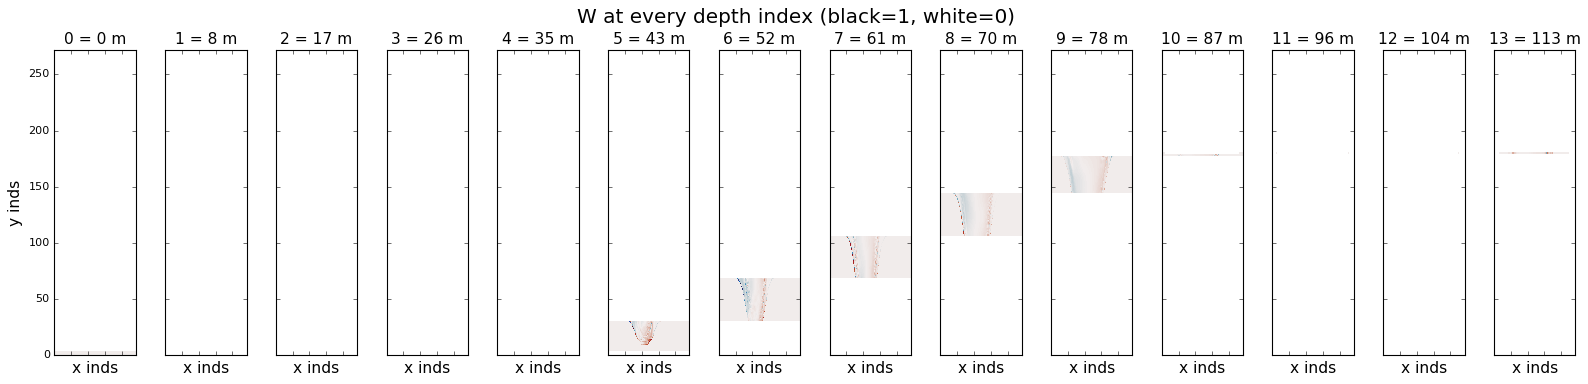

In [35]:
N = 14
deps = np.arange(0, 0+N)
time_ind = 120
fig = plot_surface_mask(vovecrtz, N, deps, time_ind)

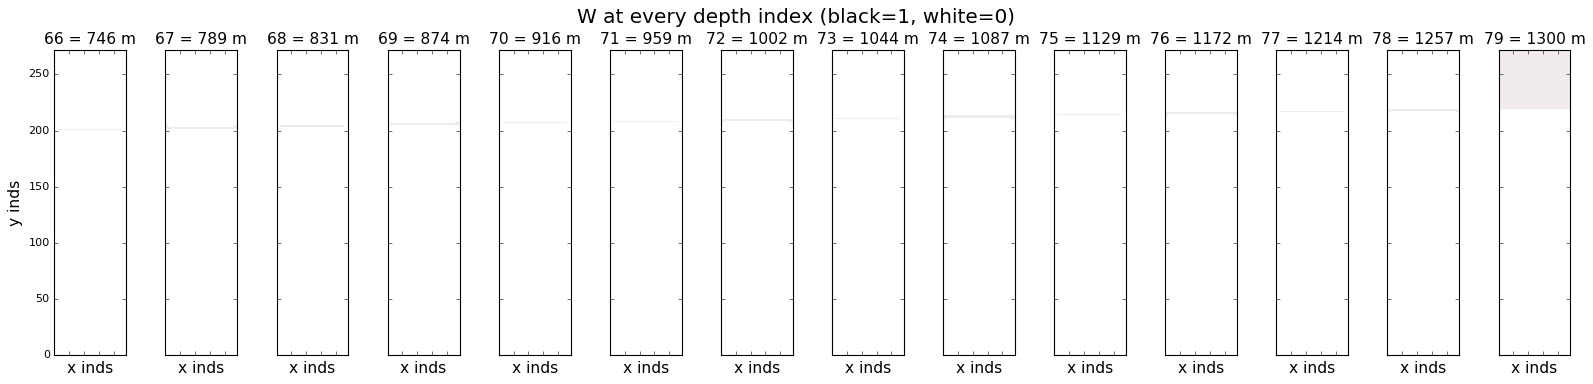

In [36]:
N = 14
deps = np.arange(66, 66+N)
time_ind = 120
fig = plot_surface_mask(vovecrtz, N, deps, time_ind)

# Viewing full rim "plane"

(0, 272)

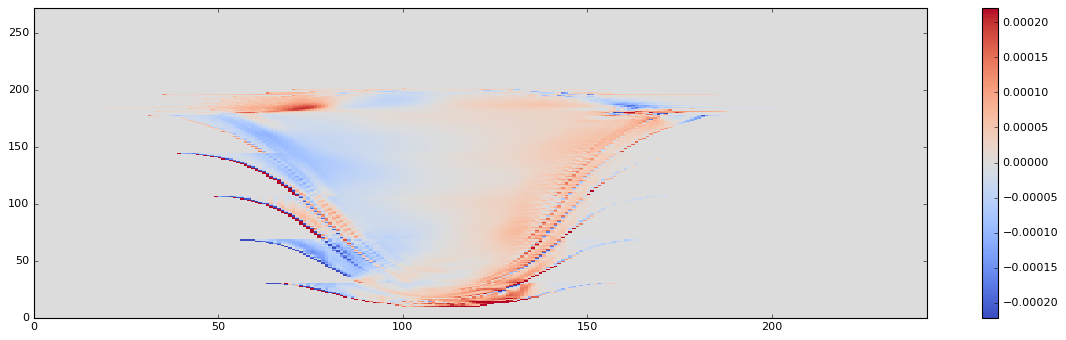

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

vmin = vovecrtz[time_ind, :, :, :].min()
vmax = vovecrtz[time_ind, :, :, :].max()
vm0 = max([abs(vmin), abs(vmax)])
vm = vm0 * 0.3

for dep in range(vovecrtz.shape[-3]):
    p = ax.pcolormesh(vovecrtz[time_ind, dep, :, :], cmap=cm.coolwarm, vmin=-1*vm, vmax=vm)
    
fig.colorbar(p, ax=ax)
ax.set_xlim([0, vovecrtz.shape[-1]])
ax.set_ylim([0, vovecrtz.shape[-2]])